In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Churn_dataset.csv')

In [9]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [10]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

<Axes: xlabel='total day minutes', ylabel='Count'>

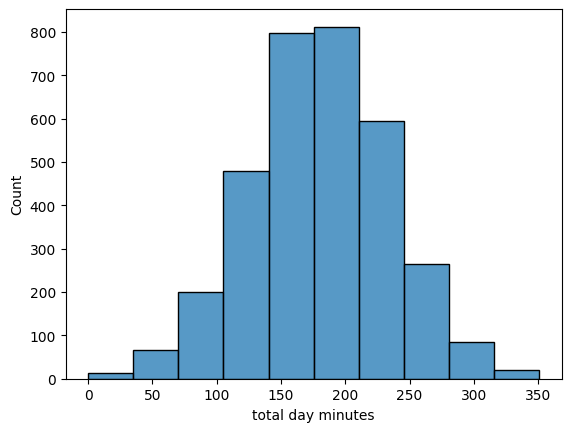

In [11]:
sns.histplot(df['total day minutes'],bins=10)

<Axes: xlabel='total day minutes', ylabel='Count'>

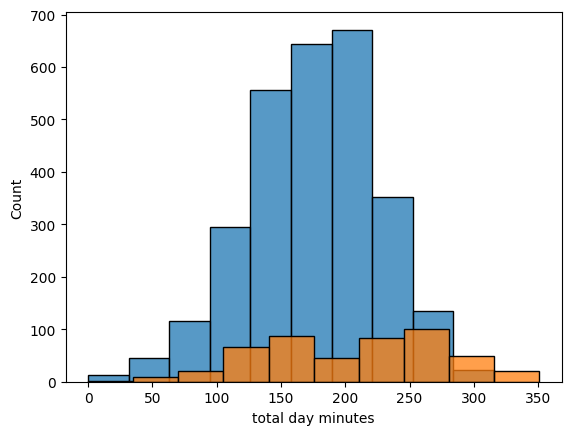

In [12]:
churner = df[df.churn == False]
sns.histplot(churner['total day minutes'],bins=10)
nonchurner = df[df.churn == True]
sns.histplot(nonchurner['total day minutes'],bins=10)

In [13]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

<Axes: xlabel='voice mail plan', ylabel='count'>

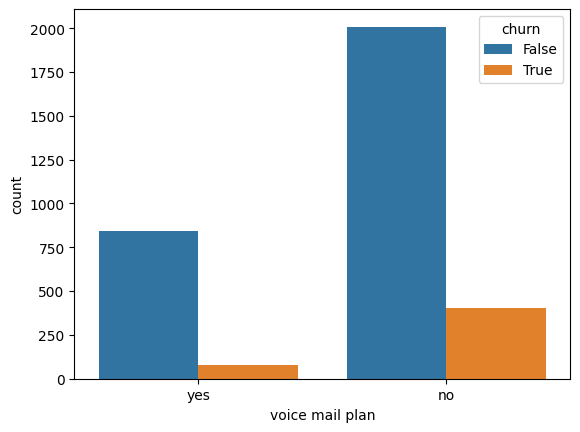

In [14]:
sns.countplot(data=df, x='voice mail plan',hue='churn')

<Axes: xlabel='international plan', ylabel='area code'>

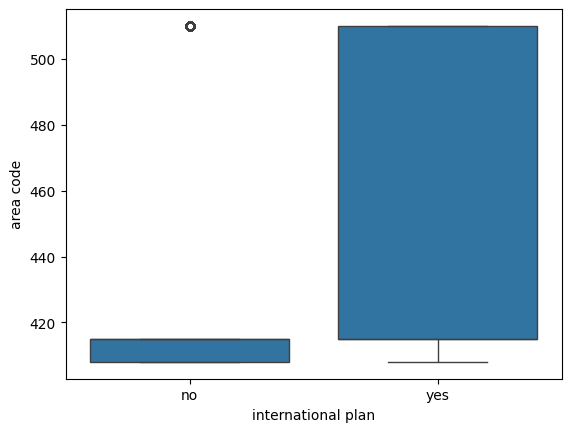

In [15]:
sns.boxplot(data=df, x='international plan', y='area code')

In [16]:
pd.crosstab(df['area code'],df['churn'])

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


In [17]:
pd.pivot_table(df, index=['area code','voice mail plan'], columns='international plan',aggfunc='count')

account length      churn       \
international plan                    no  yes    no  yes   
area code voice mail plan                                  
408       no                         567   51   567   51   
          yes                        200   20   200   20   
415       no                        1082  102  1082  102   
          yes                        423   48   423   48   
510       no                         531   78   531   78   
          yes                        207   24   207   24   

                          customer service calls      number vmail messages  \
international plan                            no  yes                    no   
area code voice mail plan                                                     
408       no                                 567   51                   567   
          yes                                200   20                   200   
415       no                                1082  102                  1082   
          yes                                423   48                   423   
510       no                                 531   78                   531   
          yes                                207   24                   207   

                               phone number       ... total intl charge       \
international plan         yes           no  yes  ...                no  yes   
area code voice mail plan                         ...                          
408       no                51          567   51  ...               567   51   
          yes               20          200   20  ...               200   20   
415       no               102         1082  102  ...              1082  102   
          yes               48          423   48  ...               423   48   
510       no                78          531   78  ...               531   78   
          yes               24          207   24  ...               207   24   

                          total intl minutes      total night calls       \
international plan                        no  yes                no  yes   
area code voice mail plan                                                  
408       no                             567   51               567   51   
          yes                            200   20               200   20   
415       no                            1082  102              1082  102   
          yes                            423   48               423   48   
510       no                             531   78               531   78   
          yes                            207   24               207   24   

                          total night charge      total night minutes       
international plan                        no  yes                  no  yes  
area code voice mail plan                                                   
408       no                             567   51                 567   51  
          yes                            200   20                 200   20  
415       no                            1082  102                1082  102  
          yes                            423   48                 423   48  
510       no                             531   78                 531   78  
          yes                            207   24                 207   24  

[6 rows x 36 columns]

In [18]:
pd.pivot_table(df, index=['area code','voice mail plan'], columns='international plan',values='total intl minutes',aggfunc='sum')

international plan              no     yes
area code voice mail plan                 
408       no                5719.5   551.9
          yes               2000.1   214.4
415       no               11130.6  1081.8
          yes               4368.7   537.3
510       no                5410.7   793.1
          yes               2058.4   254.4

<Axes: >

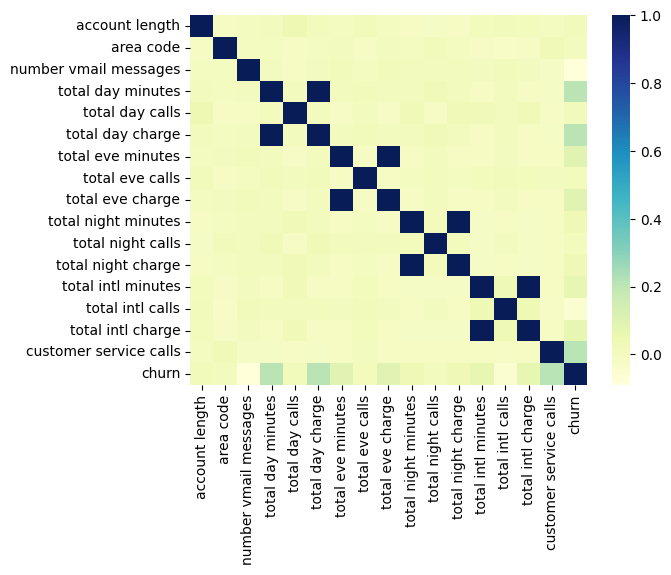

In [19]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu')

In [20]:
df['total night calls'].std()

19.568609346058558

C:\Users\user\AppData\Local\Temp\ipykernel_12636\2953597321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total night calls'])


<Axes: xlabel='total night calls', ylabel='Density'>

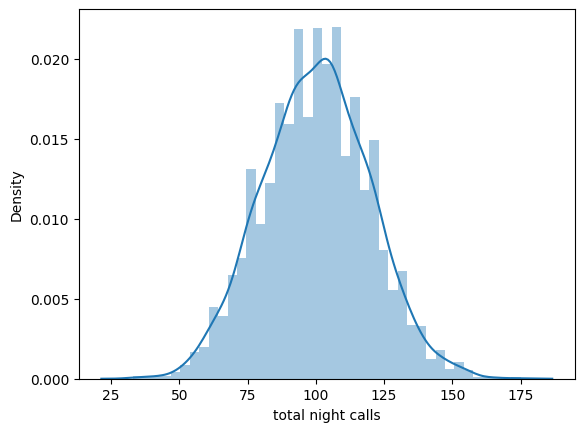

In [21]:
 sns.distplot(df['total night calls'])

In [24]:
temp = pd.crosstab(df['area code'],df['churn'])

<Axes: xlabel='area code', ylabel='Count'>

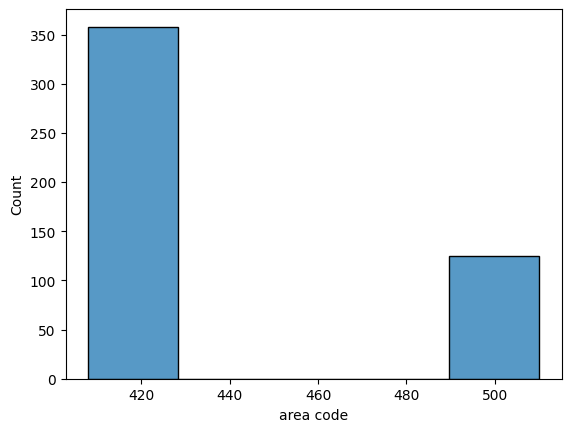

In [25]:
sns.histplot(df[df.churn==True],x='area code',bins=5)

<Axes: xlabel='area code', ylabel='Count'>

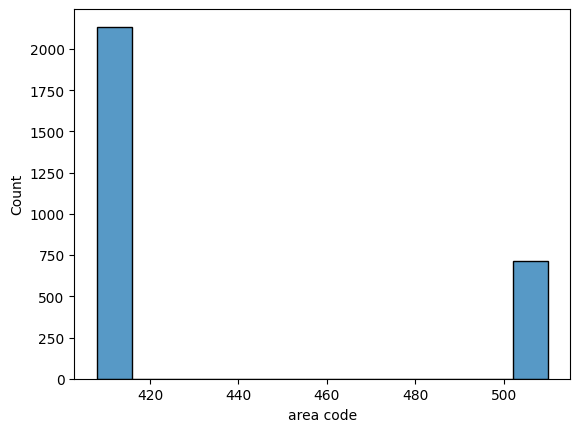

In [26]:
sns.histplot(df[df.churn==False],x='area code')

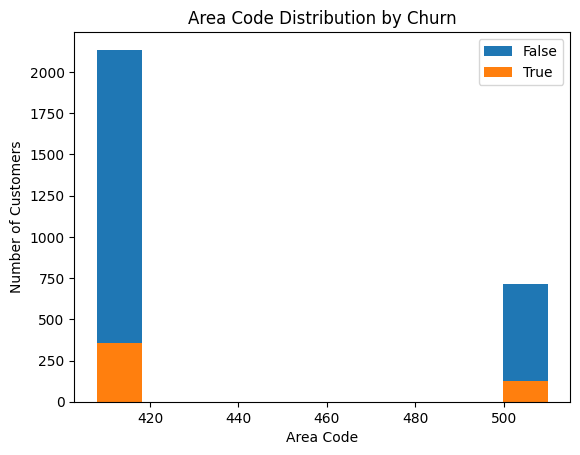

In [27]:
churn_groups = df.groupby('churn')

fig, ax = plt.subplots()
for name, group in churn_groups:
    ax.hist(group['area code'], label=name)

ax.set_xlabel('Area Code')
ax.set_ylabel('Number of Customers')
ax.set_title('Area Code Distribution by Churn')
ax.legend()
plt.show()

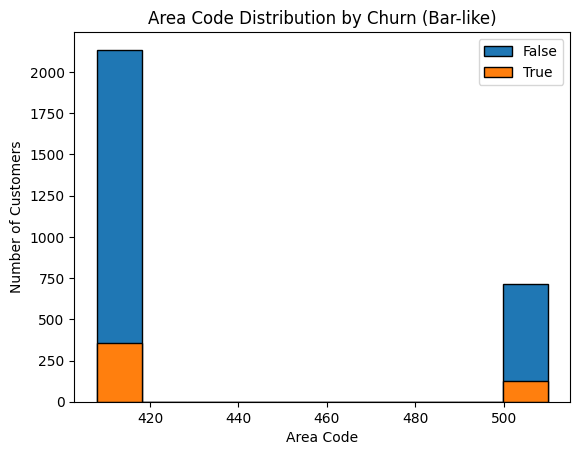

In [28]:
churn_groups = df.groupby('churn')

fig, ax = plt.subplots()
for name, group in churn_groups:
    ax.hist(group['area code'],label=name, edgecolor='black')

ax.set_xlabel('Area Code')
ax.set_ylabel('Number of Customers')
ax.set_title('Area Code Distribution by Churn (Bar-like)')
ax.legend()
plt.show()

<Axes: xlabel='area code', ylabel='count'>

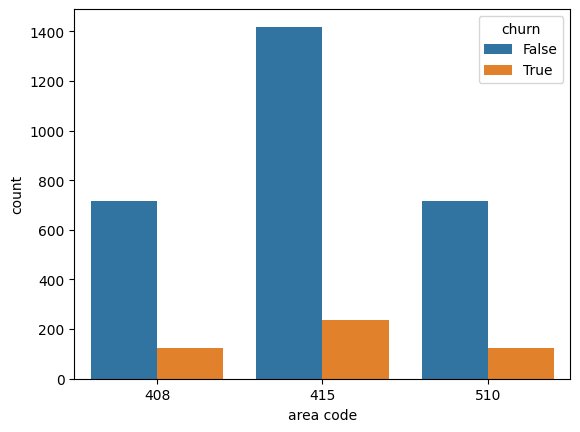

In [29]:
df['area code']= df['area code'].astype('category')
sns.countplot(x="area code", hue= "churn", data=df)